# Example Plots

## Notebook with example interactions with the database for plotting data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [2]:
from database.db_setup import *
import database.config as config

Please enter DataJoint username:  root
Please enter DataJoint password:  ···············


Connecting root@localhost:3306


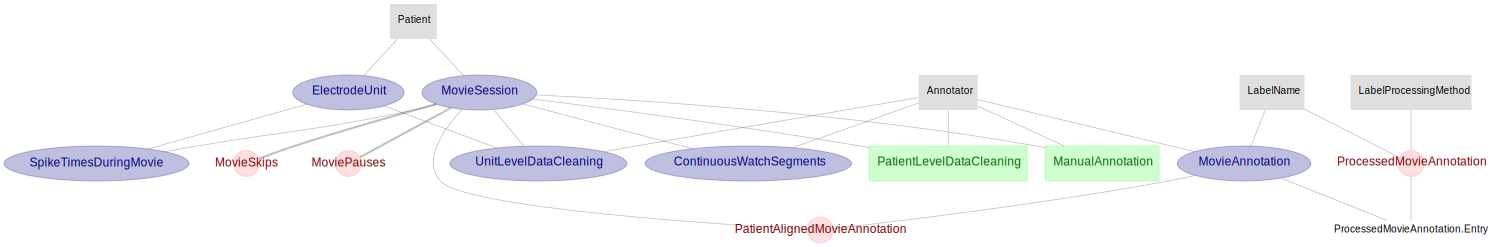

In [3]:
erd = dj.ERD(epi_schema)
erd

# Multiple Eventplots

### Check table contents: 

In [4]:
SpikeTimesDuringMovie()

patient_id patient ID,unit_id unique ID for unit (for respective patient),session_nr session ID,spike_times in case bin_size is not 0: number of spikes; otherwise: times of spikes (original data)
1,0,1,=BLOB=
1,1,1,=BLOB=
1,2,1,=BLOB=
1,3,1,=BLOB=
1,4,1,=BLOB=
1,5,1,=BLOB=
1,6,1,=BLOB=
1,7,1,=BLOB=
1,8,1,=BLOB=
1,9,1,=BLOB=


### Load in activity from the database:

In [5]:
unit0 = get_spiking_activity(1, 1, 1)
unit1 = get_spiking_activity(2, 1, 1)
unit2 = get_spiking_activity(3, 1, 1)
unit3 = get_spiking_activity(3, 1, 20)

### Plot activity 

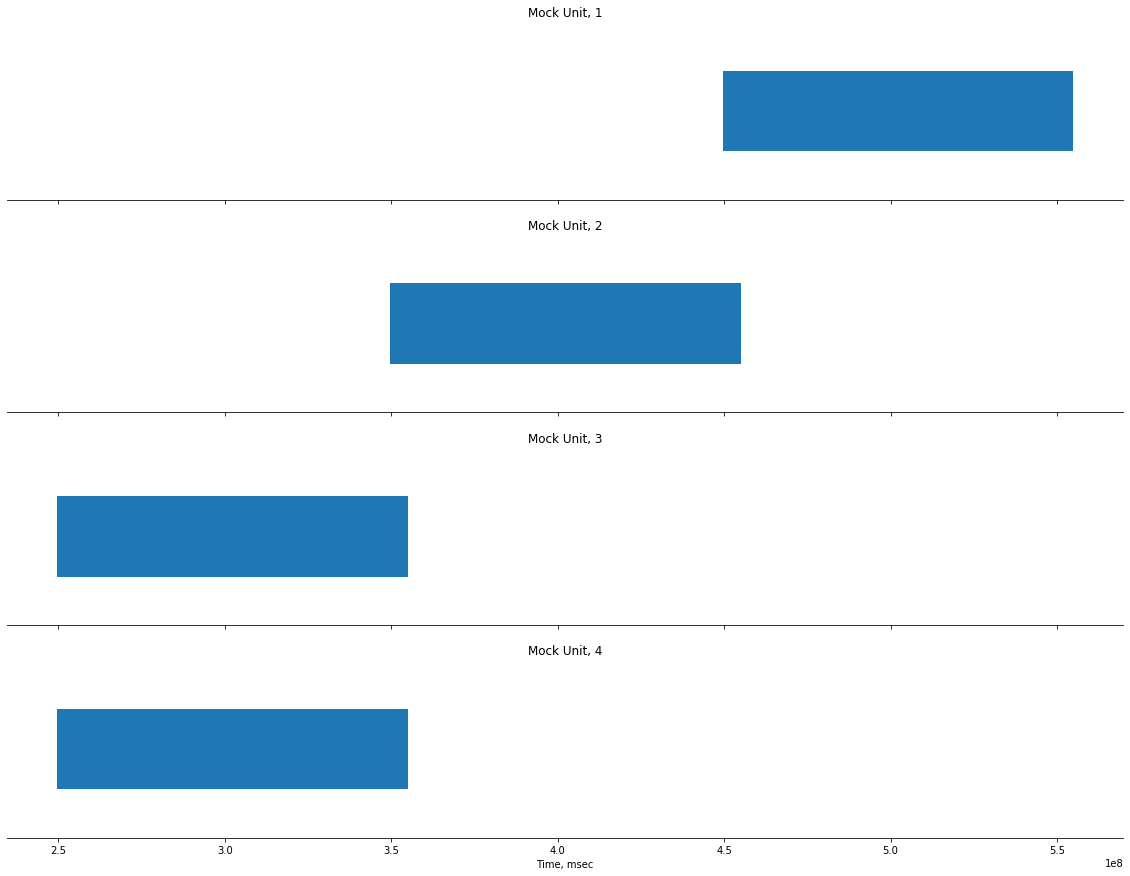

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,15), sharex=True)

ax1.eventplot(unit0)
ax1.set_title("Mock Unit, 1")
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks([])

ax2.eventplot(unit1)
ax2.set_title("Mock Unit, 2")
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yticks([])

ax3.eventplot(unit2)
ax3.set_title("Mock Unit, 3")
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_yticks([])

ax4.eventplot(unit3)
ax4.set_title("Mock Unit, 4")
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_yticks([])

plt.xlabel("Time, msec")

plt.show()

# Highlight eventplot sections

In [7]:
MovieSkips()

session_nr session ID,patient_id patient ID,values values of continuous watch segments,start_times start time points of segments,stop_times end time points of segments,notes further notes
1,1,=BLOB=,=BLOB=,=BLOB=,"time points of continuous watch, extracted from watch log - 2020-06-12 17:02:38.013860"
1,2,=BLOB=,=BLOB=,=BLOB=,"time points of continuous watch, extracted from watch log - 2020-06-12 17:02:38.133123"
1,3,=BLOB=,=BLOB=,=BLOB=,"time points of continuous watch, extracted from watch log - 2020-06-12 17:02:38.249799"


In [19]:
unit0 = get_spiking_activity(1, 1, 1)
values, start, stop = get_info_continuous_watch_segments(1, 1)

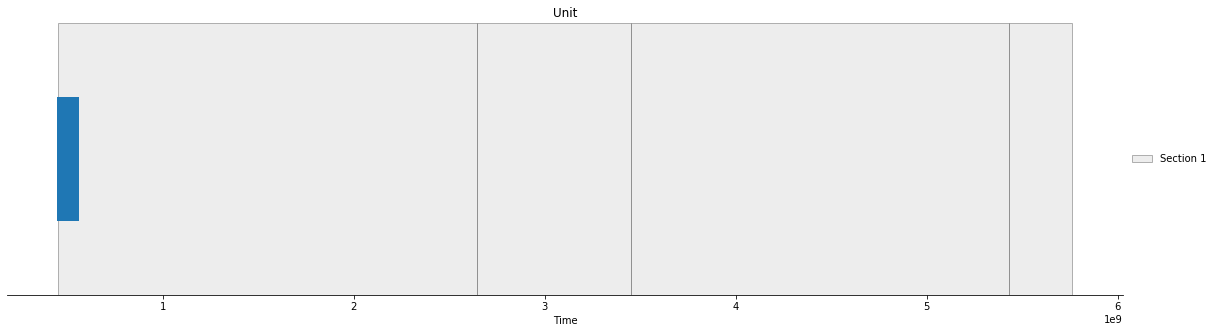

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,5))

ax1.eventplot(unit0)
ax1.set_title("Unit")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_yticks([])
ax1.set_xlabel("Time")
## add cont watch highlights
label = "Section 1"

for i in range(len(start)): 
    if i == (len(start) - 1):
        ax1.axvspan(start[i], stop[i], edgecolor='dimgray', facecolor='gainsboro',  alpha=0.5, label=label)
    else:
        ax1.axvspan(start[i], stop[i], edgecolor='dimgray', facecolor='gainsboro',  alpha=0.5)
ax1.legend(loc='center left', bbox_to_anchor=(1,0.5), frameon=False)
